## **Accessing APIs Through a URL**

**we'll extract stock market information from the AlphaVantage API.**

In [8]:
!pip install sql

In [ ]:
%load_ext autoreload
%load_ext sql
%autoreload 2

In [16]:


import os
import sqlite3
from glob import glob

import joblib      # used for sumping and loading the model
from arch.univariate.base import ARCHModelResult
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [6]:
from config import settings

dir(settings)

c:\Users\MAISON INFO\Desktop\Predicting-stock-volatility - Copie\venv\Lib\site-packages\pydantic\_internal\_fields.py:160: UserWarning: Field "model_directory" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ('settings_',)`.
  warnings.warn(


['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_validator__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',

In [7]:
settings.db_name

'stocks.sqlite'

In [19]:
url = ( 
    "https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"
    "function=TIME_SERIES_DAILY&"
    "symbol=AMBUJACEM.BSE&"
    f"apikey={settings.alpha_api_key}"
)
print("url type:", type(url))
url

url type: <class 'str'>


'https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&apikey=c232e33363792b440adecfb231e31328f177343dad1de7f6b661da93a547f5384b7e46ade0b5d8cac1e2a4d4c5536a7b55881053836d4caf34d024c7d628bd8bc635a228ef91d495097f32d2008fc38c42804c93f668778e5a8eb1f019d80209b2c9fa04995d9758f49aa5f1658888f9f398784b68ac5204698d1aae27cde73f'

**t's working! Turns out there are a lot more parameters. Let's build up our URL to include them Go to the documentation for the AlphaVantage Time Series Daily API. Expand your URL to incorporate all the parameters listed in the documentation.**

In [20]:
ticker = "AMBUJACEM.BSE"
output_size = "compact"
data_type = "json" # or csv

url = url = ( 
    "https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"
    "function=TIME_SERIES_DAILY&"
    f"symbol={ticker}&"
    f"outputsize={output_size}&"
    f"datatype={data_type}&"
    f"apikey={settings.alpha_api_key}"
)

print("url type:", type(url))
url

url type: <class 'str'>


'https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=c232e33363792b440adecfb231e31328f177343dad1de7f6b661da93a547f5384b7e46ade0b5d8cac1e2a4d4c5536a7b55881053836d4caf34d024c7d628bd8bc635a228ef91d495097f32d2008fc38c42804c93f668778e5a8eb1f019d80209b2c9fa04995d9758f49aa5f1658888f9f398784b68ac5204698d1aae27cde73f'

In [21]:
response = requests.get(url=url)

print("response type:", type(response))

response type: <class 'requests.models.Response'>


In [ ]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [22]:
response_text = response.text

print("response_text type:", type(response_text))
print(response_text[:200])

response_text type: <class 'str'>
{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AMBUJACEM.BSE",
        "3. Last Refreshed": "2024-05-09",
        "4. Output 


In [23]:
response_data = response.json()

print("response_data type:", type(response_data))

response_data type: <class 'dict'>


In [24]:
# Print `response_data` keys
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [26]:
# Extract `"Time Series (Daily)"` value from `response_data`
stock_data = response_data['Time Series (Daily)']

print("stock_data type:", type(stock_data))
# Extract data for one of the days in `stock_data`
stock_data.keys()

stock_data type: <class 'dict'>


dict_keys(['2024-05-09', '2024-05-08', '2024-05-07', '2024-05-06', '2024-05-03', '2024-05-02', '2024-04-30', '2024-04-29', '2024-04-26', '2024-04-25', '2024-04-24', '2024-04-23', '2024-04-22', '2024-04-19', '2024-04-18', '2024-04-16', '2024-04-15', '2024-04-12', '2024-04-10', '2024-04-09', '2024-04-08', '2024-04-05', '2024-04-04', '2024-04-03', '2024-04-02', '2024-04-01', '2024-03-28', '2024-03-27', '2024-03-26', '2024-03-22', '2024-03-21', '2024-03-20', '2024-03-19', '2024-03-18', '2024-03-15', '2024-03-14', '2024-03-13', '2024-03-12', '2024-03-11', '2024-03-07', '2024-03-06', '2024-03-05', '2024-03-04', '2024-03-01', '2024-02-29', '2024-02-28', '2024-02-27', '2024-02-26', '2024-02-23', '2024-02-22', '2024-02-21', '2024-02-20', '2024-02-19', '2024-02-16', '2024-02-15', '2024-02-14', '2024-02-13', '2024-02-12', '2024-02-09', '2024-02-08', '2024-02-07', '2024-02-06', '2024-02-05', '2024-02-02', '2024-02-01', '2024-01-31', '2024-01-30', '2024-01-29', '2024-01-25', '2024-01-24', '2024-01-

In [27]:
stock_data['2024-04-08']

{'1. open': '627.0000',
 '2. high': '634.6000',
 '3. low': '622.0500',
 '4. close': '630.3000',
 '5. volume': '99149'}

In [28]:
df_ambuja = pd.DataFrame.from_dict(stock_data, orient='index', dtype="float")

print("df_ambuja shape:", df_ambuja.shape)
print()
print(df_ambuja.info())
df_ambuja.head(10)

df_ambuja shape: (100, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2024-05-09 to 2023-12-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7+ KB
None


,1. open,2. high,3. low,4. close,5. volume
2024-05-09,595.35,596.00,571.95,574.30,115025.0
2024-05-08,590.15,600.85,587.65,594.35,66462.0
2024-05-07,609.95,612.35,589.00,593.55,101391.0
2024-05-06,626.95,626.95,599.70,605.95,110232.0
2024-05-03,630.15,634.75,616.55,622.25,105089.0
2024-05-02,616.95,630.85,609.70,625.40,277907.0
2024-04-30,636.55,636.55,616.40,619.70,172440.0
2024-04-29,641.30,641.30,625.15,629.80,85844.0
2024-04-26,640.45,641.90,630.20,632.05,121787.0
2024-04-25,645.70,649.00,629.05,638.40,128668.0


In [29]:
# changing datatype of dates from object to float
df_ambuja.index = pd.to_datetime(df_ambuja.index)
df_ambuja.index 

DatetimeIndex(['2024-05-09', '2024-05-08', '2024-05-07', '2024-05-06',
               '2024-05-03', '2024-05-02', '2024-04-30', '2024-04-29',
               '2024-04-26', '2024-04-25', '2024-04-24', '2024-04-23',
               '2024-04-22', '2024-04-19', '2024-04-18', '2024-04-16',
               '2024-04-15', '2024-04-12', '2024-04-10', '2024-04-09',
               '2024-04-08', '2024-04-05', '2024-04-04', '2024-04-03',
               '2024-04-02', '2024-04-01', '2024-03-28', '2024-03-27',
               '2024-03-26', '2024-03-22', '2024-03-21', '2024-03-20',
               '2024-03-19', '2024-03-18', '2024-03-15', '2024-03-14',
               '2024-03-13', '2024-03-12', '2024-03-11', '2024-03-07',
               '2024-03-06', '2024-03-05', '2024-03-04', '2024-03-01',
               '2024-02-29', '2024-02-28', '2024-02-27', '2024-02-26',
               '2024-02-23', '2024-02-22', '2024-02-21', '2024-02-20',
               '2024-02-19', '2024-02-16', '2024-02-15', '2024-02-14',
      

In [30]:
df_ambuja.index.name = 'date'
df_ambuja

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-05-09,595.35,596.00,571.95,574.30,115025.0
2024-05-08,590.15,600.85,587.65,594.35,66462.0
2024-05-07,609.95,612.35,589.00,593.55,101391.0
2024-05-06,626.95,626.95,599.70,605.95,110232.0
2024-05-03,630.15,634.75,616.55,622.25,105089.0
...,...,...,...,...,...
2023-12-19,529.85,529.90,516.75,522.30,74154.0
2023-12-18,529.60,532.55,524.30,525.45,168807.0
2023-12-15,523.10,529.60,514.65,522.35,316907.0


In [31]:
# changing columns names
df_ambuja.columns = [c.split('. ')[1] for c in df_ambuja.columns]

In [32]:
print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-05-09 to 2023-12-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,595.35,596.00,571.95,574.30,115025.0
2024-05-08,590.15,600.85,587.65,594.35,66462.0
2024-05-07,609.95,612.35,589.00,593.55,101391.0
2024-05-06,626.95,626.95,599.70,605.95,110232.0
2024-05-03,630.15,634.75,616.55,622.25,105089.0


# Defensive Programming

**we will Formalize our extraction and transformation process for the AlphaVantage API into a reproducible function, so we didn't get errors.**

In [33]:
def get_daily(ticker, output_size="full"):

    """Get daily time series of an equity from AlphaVantage API.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the equity.
    output_size : str, optional
        Number of observations to retrieve. "compact" returns the
        latest 100 observations. "full" returns all observations for
        equity. By default "full".

    Returns
    -------
    pd.DataFrame
        Columns are 'open', 'high', 'low', 'close', and 'volume'.
        All are numeric.
    """
    # Create URL 
    url = url = ( 
    "https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"
    "function=TIME_SERIES_DAILY&"
    f"symbol={ticker}&"
    f"outputsize={output_size}&"
    f"datatype=json&"
    f"apikey={settings.alpha_api_key}"
    )

    # Send request to API
    response = requests.get(url=url)

    # Extract JSON data from response 
    response_data = response.json()

    # handling "Time Series (Daily)" does not exit problem
    if "Time Series (Daily)" not in response_data.keys():
        raise Exception(
            f"Invalid API Call. Check that ticker symbol '{ticker} is correct."
        )
    
    # Read data into DataFrame 
    stock_data = response_data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(stock_data, orient='index', dtype="float")

    # Convert index to `DatetimeIndex` named "date"
    df.index = pd.to_datetime(df.index)
    df.index.name = "date"

    # Remove numbering from columns 
    df.columns = [c.split('. ')[1] for c in df.columns]

    # Return DataFrame
    return df

In [34]:
df_ambuja = get_daily(ticker="AMBUJACEM.BSE", output_size="compact")

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-05-09 to 2023-12-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,595.35,596.00,571.95,574.30,115025.0
2024-05-08,590.15,600.85,587.65,594.35,66462.0
2024-05-07,609.95,612.35,589.00,593.55,101391.0
2024-05-06,626.95,626.95,599.70,605.95,110232.0
2024-05-03,630.15,634.75,616.55,622.25,105089.0


In [35]:
df_ambuja = get_daily(ticker="IBM", output_size="compact")

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-05-09 to 2023-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,167.50,167.55,165.88,166.27,4266616.0
2024-05-08,168.01,170.26,167.90,169.90,3522011.0
2024-05-07,169.00,169.29,167.94,168.38,3155260.0
2024-05-06,166.50,168.67,166.38,168.61,4222266.0
2024-05-03,165.00,166.61,164.92,165.71,3400405.0


In [36]:
df_ambuja = get_daily(ticker="IBM", output_size="full")

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6170 entries, 2024-05-09 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6170 non-null   float64
 1   high    6170 non-null   float64
 2   low     6170 non-null   float64
 3   close   6170 non-null   float64
 4   volume  6170 non-null   float64
dtypes: float64(5)
memory usage: 289.2 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,167.50,167.55,165.88,166.27,4266616.0
2024-05-08,168.01,170.26,167.90,169.90,3522011.0
2024-05-07,169.00,169.29,167.94,168.38,3155260.0
2024-05-06,166.50,168.67,166.38,168.61,4222266.0
2024-05-03,165.00,166.61,164.92,165.71,3400405.0


In [37]:
# Test your Exception
df_test = get_daily(ticker="ABUJACEM.BSE")

Exception: Invalid API Call. Check that ticker symbol 'ABUJACEM.BSE is correct.

<font size="+3"><strong>Test Driven Development</strong></font>

**First, we'll take the code we used to access the API and build an AlphaVantageAPI class. This will allow us to reuse our code. Second, we'll create a SQLRepository class that will help us load our stock data into a SQLite database and then extract it for later use. Additionally, we'll build this code using a technique called test driven development**

``Building a Data Module``

**We will create a data module that encompasses classes for extracting, transforming, and loading data.**

In [38]:
from data import AlphaVantageAPI

av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


In [39]:
# Define Suzlon ticker symbol
ticker = "SUZLON.BSE"

# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker=ticker)

print("df_suzlon type:", type(df_suzlon))
print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon type: <class 'pandas.core.frame.DataFrame'>
df_suzlon shape: (4570, 5)


,open,high,low,close,volume
date,,,,,
2024-05-09,40.00,40.55,38.90,39.60,3217921.0
2024-05-08,39.78,40.15,39.15,39.96,2857152.0
2024-05-07,40.70,41.07,39.30,39.78,1972516.0
2024-05-06,41.47,41.95,40.40,40.64,3147811.0
2024-05-03,42.00,42.30,41.25,41.37,1450864.0


In [40]:
# Check whether "get_daily" return a DataFrame 
assert isinstance(df_suzlon, pd.DataFrame), "Output must be a DataFrame"  # if True nothing will happer, otherwise raises an exception

# Does DataFrame have 5 columns or not
assert df_suzlon.shape[1] == 5

# Does DataFrame have a DatetimeIndex
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index name "date"?
df_suzlon.index.name = "date"

In [41]:
# Does DataFrame have correct column names?
df_suzlon.columns.to_list() == ['open','high','low','close','volume']

# Are columns have correct data type?
assert all(df_suzlon.dtypes == float)


`SQL Repository Class using SQLite for our database`

**We will need to store our data in a database becase it wouldn't be efficient if our application needed to get data from the AlphaVantage API every time we wanted to explore our data or build a model**

In [42]:
connection = sqlite3.connect(database=settings.db_name, check_same_thread=False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


**Making tests**

In [43]:
# Import SQLRepository class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection = connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [44]:
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [45]:
conn = sqlite3.connect('stocks.sqlite')

In [46]:
cursor = conn.cursor()

In [47]:
cursor.execute('SELECT * FROM "SUZLON.BSE" LIMIT 5')

In [48]:
results = cursor.fetchall()

In [49]:
print(results)

[('2024-05-09 00:00:00', 40.0, 40.55, 38.9, 39.6, 3217921.0), ('2024-05-08 00:00:00', 39.78, 40.15, 39.15, 39.96, 2857152.0), ('2024-05-07 00:00:00', 40.7, 41.07, 39.3, 39.78, 1972516.0), ('2024-05-06 00:00:00', 41.47, 41.95, 40.4, 40.64, 3147811.0), ('2024-05-03 00:00:00', 42.0, 42.3, 41.25, 41.37, 1450864.0)]


In [50]:
df = pd.DataFrame(results, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
print(df)

                  Date   Open   High    Low  Close     Volume
0  2024-05-09 00:00:00  40.00  40.55  38.90  39.60  3217921.0
1  2024-05-08 00:00:00  39.78  40.15  39.15  39.96  2857152.0
2  2024-05-07 00:00:00  40.70  41.07  39.30  39.78  1972516.0
3  2024-05-06 00:00:00  41.47  41.95  40.40  40.64  3147811.0
4  2024-05-03 00:00:00  42.00  42.30  41.25  41.37  1450864.0


In [51]:
sql = "SELECT * FROM 'SUZLON.BSE'"
df_suzlon_test = pd.read_sql(
    sql = sql, con=connection, parse_dates=["date"], index_col="date"
)

print("df_suzlon_test type:", type(df_suzlon_test))
print()
print(df_suzlon_test.info())
df_suzlon_test.head()

df_suzlon_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4570 entries, 2024-05-09 to 2005-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4570 non-null   float64
 1   high    4570 non-null   float64
 2   low     4570 non-null   float64
 3   close   4570 non-null   float64
 4   volume  4570 non-null   float64
dtypes: float64(5)
memory usage: 214.2 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,40.00,40.55,38.90,39.60,3217921.0
2024-05-08,39.78,40.15,39.15,39.96,2857152.0
2024-05-07,40.70,41.07,39.30,39.78,1972516.0
2024-05-06,41.47,41.95,40.40,40.64,3147811.0
2024-05-03,42.00,42.30,41.25,41.37,1450864.0


**Reading tables from our database**

In [52]:
# first, we will test our read_table function

# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500) 

# Is `df_suzlon` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index named "date"?
assert df_suzlon.index.name == "date"

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape == (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list() == ['open','high','low','close','volume']

# Are the column data types correct?
assert all(df_suzlon.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()


df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2024-05-09 to 2014-03-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2024-05-09,40.00,40.55,38.90,39.60,3217921.0
2024-05-08,39.78,40.15,39.15,39.96,2857152.0
2024-05-07,40.70,41.07,39.30,39.78,1972516.0
2024-05-06,41.47,41.95,40.40,40.64,3147811.0
2024-05-03,42.00,42.30,41.25,41.37,1450864.0


# Comparing Stock Returns

In [53]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(
    table_name=ticker, records=ambuja_records, if_exists="replace" 
)

response


{'transaction_successful': True, 'records_inserted': 4767}

In [54]:
ambuja_records.shape

(4767, 5)

In [55]:
df_ambuja = repo.read_table(table_name=ticker, limit=2500)

print("df_ambuja type", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2024-05-09,595.35,596.00,571.95,574.30,115025.0
2024-05-08,590.15,600.85,587.65,594.35,66462.0
2024-05-07,609.95,612.35,589.00,593.55,101391.0
2024-05-06,626.95,626.95,599.70,605.95,110232.0
2024-05-03,630.15,634.75,616.55,622.25,105089.0


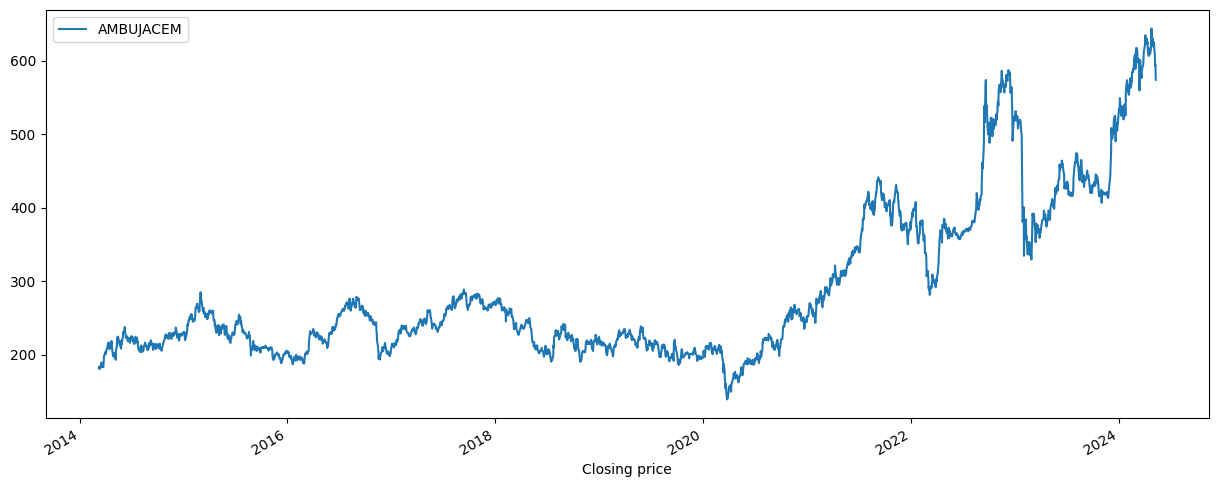

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot 'df_ambuja' closing price
df_ambuja["close"].plot(ax=ax, label="AMBUJACEM", color="C0") 

# Label axes
plt.xlabel("Date")
plt.xlabel("Closing price")

# Add legend
plt.legend()

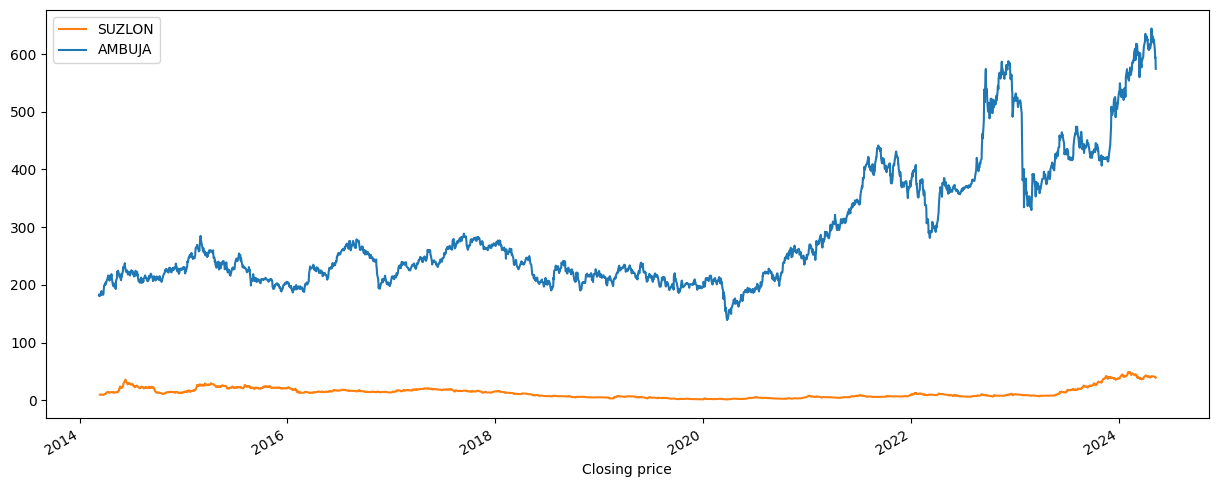

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot 'df_ambuja' vs 'df_suzlon' closing price
df_suzlon["close"].plot(ax=ax, label="SUZLON", color="C1")
df_ambuja["close"].plot(ax=ax, label="AMBUJA", color="C0") 

# Label axes
plt.xlabel("Date")
plt.xlabel("Closing price")

# Add legend
plt.legend()

**Comparing Returns**

In [58]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column
df_ambuja['return'] = df_ambuja["close"].pct_change() * 100

print("df_ambuja shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_ambuja shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2014-03-10 to 2024-05-09
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2014-03-10,181.60,185.35,180.00,182.20,166681.0,NaN
2014-03-11,182.10,187.30,180.65,184.00,184033.0,0.987925
2014-03-12,183.05,184.80,178.15,180.45,70523.0,-1.929348
2014-03-13,180.50,184.80,180.00,180.65,55046.0,0.110834
2014-03-14,180.00,182.50,176.00,181.45,101096.0,0.442845


In [59]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True, inplace=True)

# Create "return" column
df_suzlon['return'] = df_suzlon["close"].pct_change() * 100

print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2014-03-13 to 2024-05-09
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2014-03-13,10.20,10.32,9.96,10.00,1019973.0,NaN
2014-03-14,10.00,10.14,9.96,10.01,749805.0,0.100000
2014-03-18,10.07,10.25,9.77,9.85,1120613.0,-1.598402
2014-03-19,9.86,10.09,9.86,9.98,707588.0,1.319797
2014-03-20,9.95,10.05,9.70,9.74,1028552.0,-2.404810


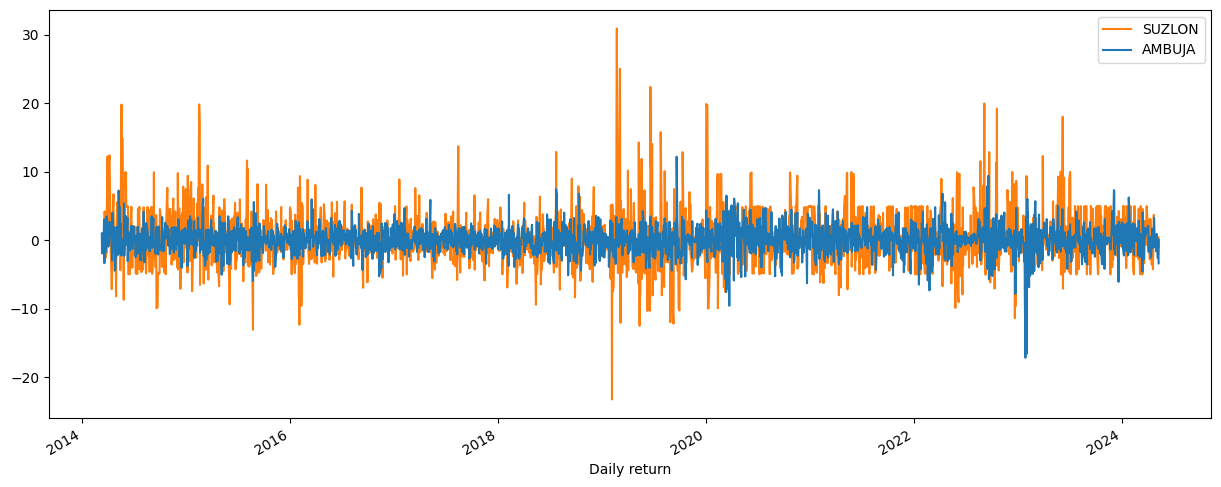

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot 'df_ambuja' vs 'df_suzlon' closing price
df_suzlon["return"].plot(ax=ax, label="SUZLON", color="C1")
df_ambuja["return"].plot(ax=ax, label="AMBUJA", color="C0") 

# Label axes
plt.xlabel("Date")
plt.xlabel("Daily return")

# Add legend
plt.legend()

<font size="+3"><strong>Predicting Volatility</strong></font>

# Prepare Data

In [61]:
def wrangle_data(ticker, n_observations):

    """Extract table data from database. Calculate returns.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the stock (also table name in database).

    n_observations : int
        Number of observations to return.

    Returns
    -------
    pd.Series
        Name will be `"return"`. There will be no `NaN` values.
    """
    # Get table from database
    df = repo.read_table(table_name=ticker, limit=n_observations+1)

    # Sort DataFrame ascending by date
    df.sort_index(ascending=True, inplace=True)

    # Create "return" column
    df["return"] = df['close'].pct_change() * 100

    # Return returns
    return df['return'].dropna()

In [62]:
# wrangle data function

y_ambuja = wrangle_data(ticker="AMBUJACEM.BSE", n_observations=2500)

# Is `y_ambuja` a Series?
assert isinstance(y_ambuja, pd.Series)

# Are there 2500 observations in the Series?
assert len(y_ambuja) == 2500

# Is `y_ambuja` name "return"?
assert y_ambuja.name == "return"

# Does `y_ambuja` have a DatetimeIndex?
assert isinstance(y_ambuja.index, pd.DatetimeIndex)

# Is index sorted ascending?
assert all(y_ambuja.index == y_ambuja.sort_index(ascending=True).index)

# Are there no `NaN` values?
assert y_ambuja.isnull().sum() == 0

y_ambuja.head()

date
2014-03-10    0.330396
2014-03-11    0.987925
2014-03-12   -1.929348
2014-03-13    0.110834
2014-03-14    0.442845
Name: return, dtype: float64

In [63]:
y_suzlon = wrangle_data(ticker="SUZLON.BSE", n_observations=2500)

print("y_suzlon type:", type(y_suzlon))
print("y_suzlon shape:", y_suzlon.shape)
y_suzlon.head()

y_suzlon type: <class 'pandas.core.series.Series'>
y_suzlon shape: (2500,)


date
2014-03-13   -2.056807
2014-03-14    0.100000
2014-03-18   -1.598402
2014-03-19    1.319797
2014-03-20   -2.404810
Name: return, dtype: float64

## Explore

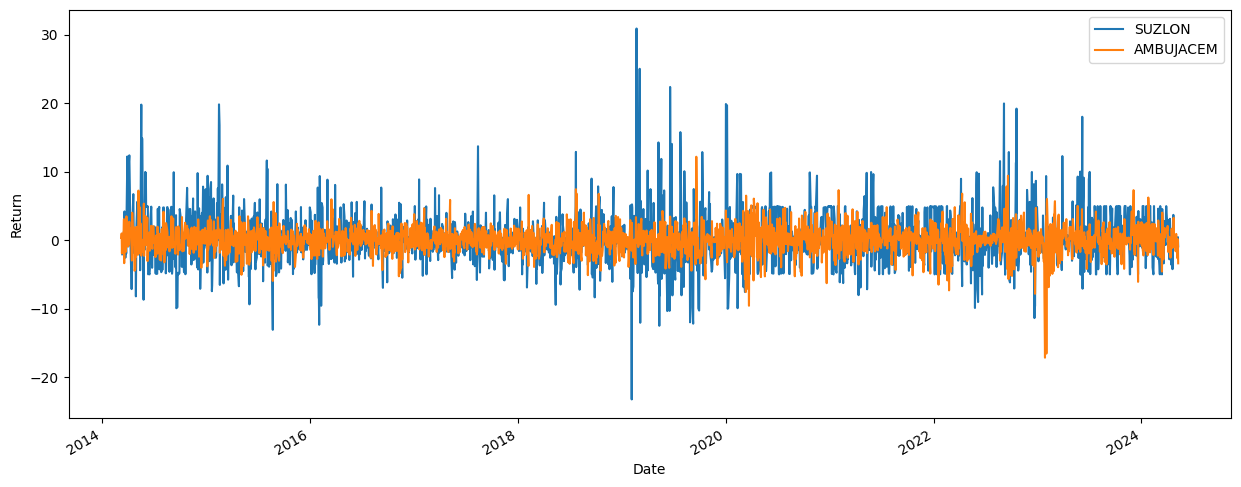

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for `df_suzlon` and `df_ambuja`
y_suzlon.plot(ax=ax, label="SUZLON")
y_ambuja.plot(ax=ax, label="AMBUJACEM")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend()

Text(0.5, 1.0, 'Distribution of Zmbuja Cement Daily Returns')

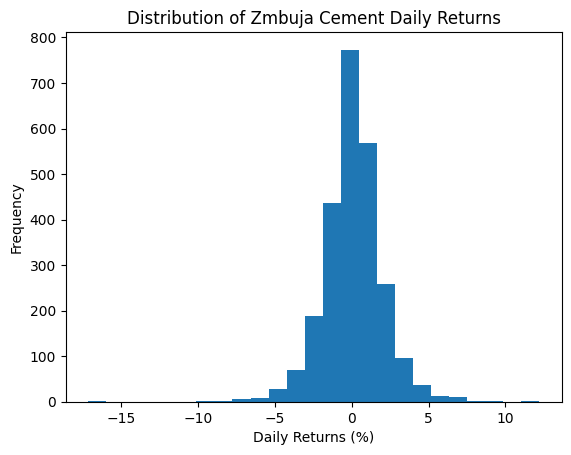

In [65]:
# Create histogram of `y_ambuja`, 25 bins
plt.hist(y_ambuja, bins=25)

# Add axis labels
plt.xlabel("Daily Returns (%)")
plt.ylabel("Frequency")


# Add title
plt.title("Distribution of Zmbuja Cement Daily Returns")

In [66]:
suzlon_daily_volatility = y_suzlon.std()
ambuja_daily_volatility = y_ambuja.std()

print("Suzlon Daily Volatility:", suzlon_daily_volatility)
print("Ambuja Daily Volatility:", ambuja_daily_volatility)

Suzlon Daily Volatility: 3.897633549864732
Ambuja Daily Volatility: 1.9569993986330945


In [67]:
suzlon_annual_volatility = suzlon_daily_volatility * np.sqrt(252) # 252 trading days in a year
ambuja_annual_volatility = ambuja_daily_volatility * np.sqrt(252)

print("Suzlon Annual Volatility:", suzlon_annual_volatility)
print("Ambuja Annual Volatility:", ambuja_annual_volatility)

Suzlon Annual Volatility: 61.873014447623696
Ambuja Annual Volatility: 31.066402348116753


In [68]:
ambuja_rolling_50d_volatility = y_ambuja.rolling(window=50).std().dropna()

print("rolling_50d_volatility type:", type(ambuja_rolling_50d_volatility))
print("rolling_50d_volatility shape:", ambuja_rolling_50d_volatility.shape)
ambuja_rolling_50d_volatility.head()

rolling_50d_volatility type: <class 'pandas.core.series.Series'>
rolling_50d_volatility shape: (2451,)


date
2014-05-26    2.309897
2014-05-27    2.314916
2014-05-28    2.421607
2014-05-29    2.428918
2014-05-30    2.432714
Name: return, dtype: float64

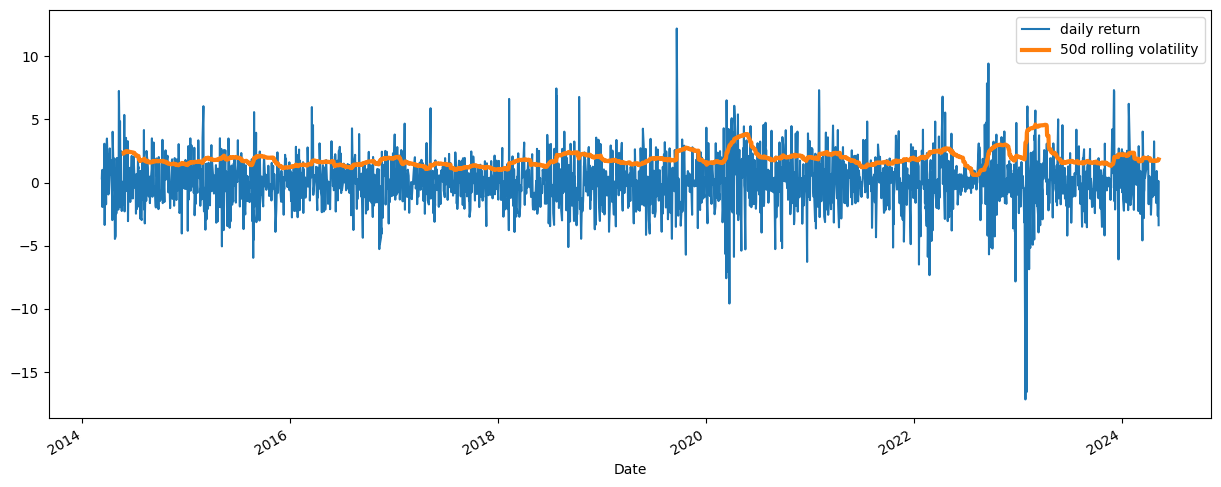

In [69]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja`
y_ambuja.plot(ax=ax, label="daily return")

# Plot `ambuja_rolling_50d_volatility`
ambuja_rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth="3")

# Add x-axis label
plt.xlabel("Date")

# Add legend
plt.legend()

Text(0, 0.5, 'Squared Returns')

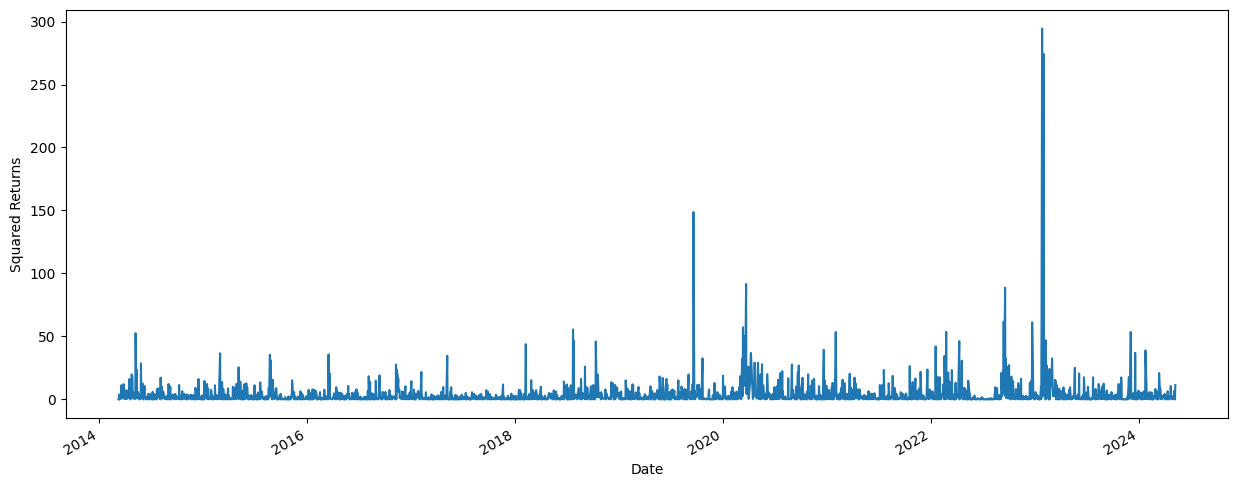

In [70]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot squared returns
(y_ambuja**2).plot(ax=ax)

# Add axis labels
plt.xlabel("Date")
plt.ylabel("Squared Returns")

Text(0, 0.5, 'Correlation Coefficient')

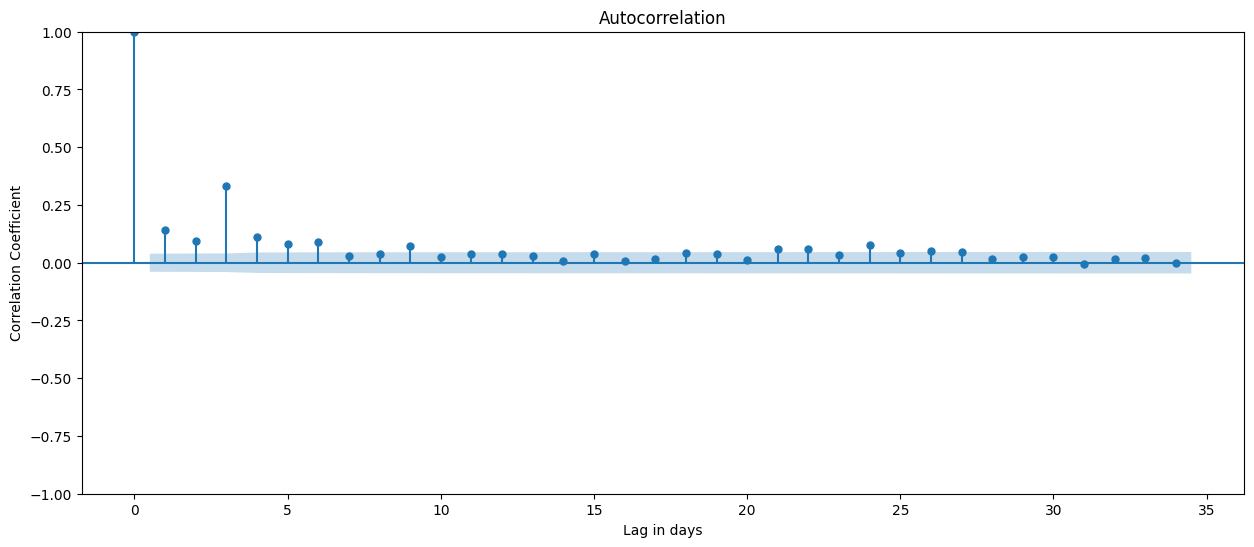

In [71]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared returns
plot_acf(y_ambuja**2, ax=ax)

# Add axis labels
plt.xlabel('Lag in days')
plt.ylabel('Correlation Coefficient')

Text(0, 0.5, 'Correlation Coefficient')

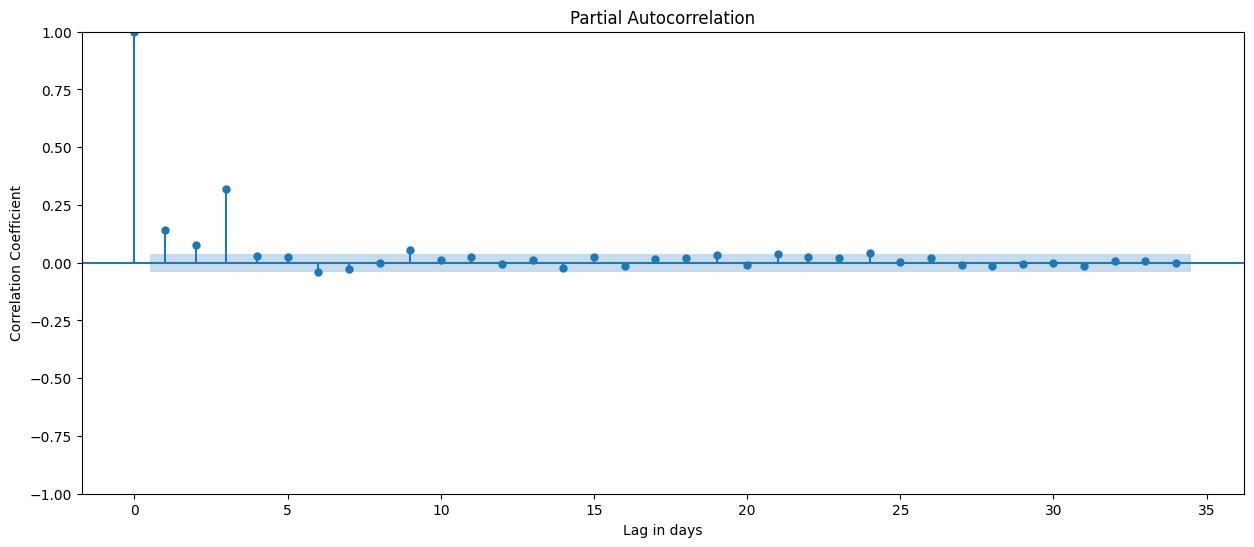

In [72]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create PACF of squared returns
plot_pacf(y_ambuja**2, ax=ax)

# Add axis labels
plt.xlabel('Lag in days')
plt.ylabel('Correlation Coefficient')

## Split

In [73]:
cutoff_test = int(len(y_ambuja) *0.8)
y_ambuja_train = y_ambuja.iloc[:cutoff_test]

print("y_ambuja_train type:", type(y_ambuja_train))
print("y_ambuja_train shape:", y_ambuja_train.shape)
y_ambuja_train.tail()

y_ambuja_train type: <class 'pandas.core.series.Series'>
y_ambuja_train shape: (2000,)


date
2022-04-25    0.614480
2022-04-26    2.270313
2022-04-27   -0.103856
2022-04-28   -0.311891
2022-04-29   -3.050450
Name: return, dtype: float64

# Build Model (Using a GARCH MODEL)

In [74]:
# Build and train model
model = arch_model(
    y_ambuja_train,
    p=1,
    q=1,
    rescale=False
).fit(disp=0)

print("model type:", type(model))

# Show model summary
model.summary()

model type: <class 'arch.univariate.base.ARCHModelResult'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4014.16
Distribution:                  Normal   AIC:                           8036.33
Method:            Maximum Likelihood   BIC:                           8058.73
                                        No. Observations:                 2000
Date:                Fri, May 10 2024   Df Residuals:                     1999
Time:                        21:29:08   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0706  3.932e-02      1.796  7.244e-02 [-6.433e-03,  0.148]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1457  6.545e-02      2.226  2.600e-02   [1.743e-02,  0.274]
alpha[1]       0.0608  1.607e-02      3.782  1.557e-04 [2.927e-02,9.225e-02]
beta[1]        0.8973  3.096e-02     28.987 9.548e-185     [  0.837,  0.958]
============================================================================

Covariance estimator: robust
"""

In [75]:
model.conditional_volatility.head() #conditional volatility = changing over time

date
2014-03-10    1.995311
2014-03-11    1.929316
2014-03-12    1.880658
2014-03-13    1.887440
2014-03-14    1.828232
Name: cond_vol, dtype: float64

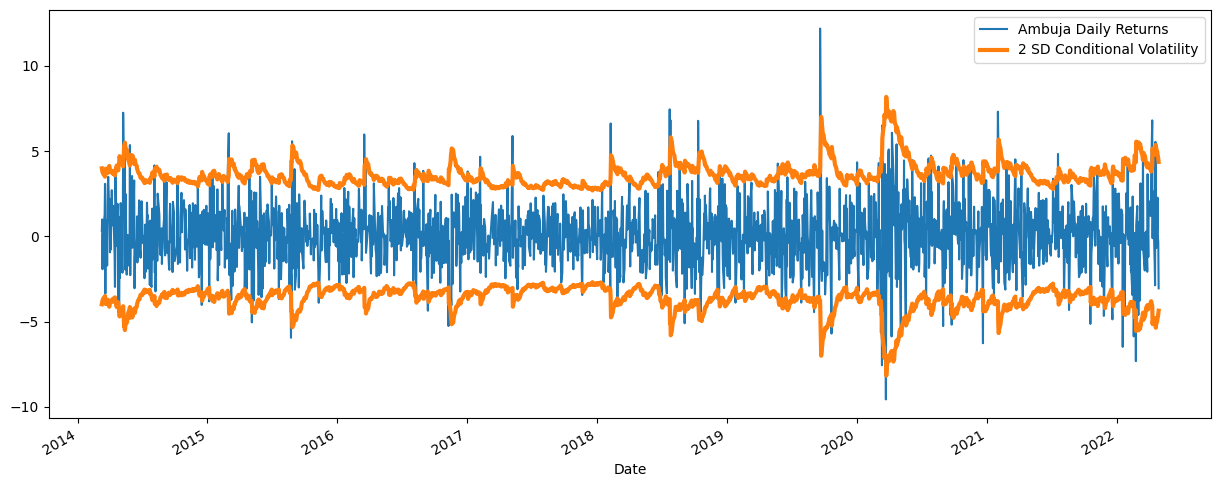

In [76]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja_train`
y_ambuja_train.plot(ax=ax, label="Ambuja Daily Returns")

# Plot conditional volatility * 2
(2 * model.conditional_volatility).plot(
    ax=ax, color='C1', label="2 SD Conditional Volatility", linewidth=3
)

# Plot conditional volatility * -2
(-2 * model.conditional_volatility.rename('')).plot(
    ax=ax, color='C1', linewidth=3
)


# Add axis labels
plt.xlabel("Date")


# Add legend
plt.legend()

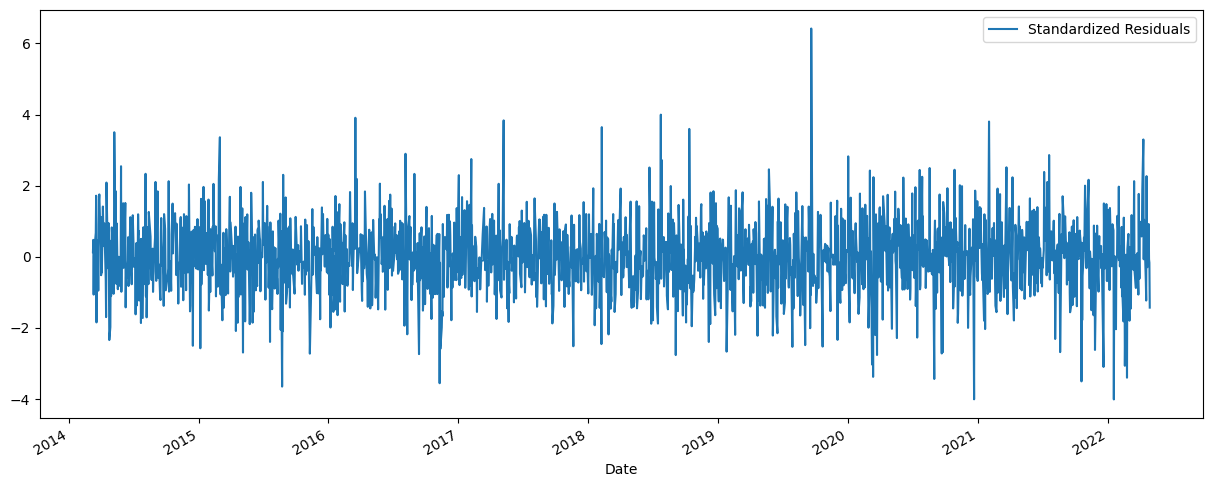

In [77]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model.std_resid.plot(ax=ax, label="Standardized Residuals")

# Add axis labels
plt.xlabel("Date")


# Add legend
plt.legend()

Text(0.5, 1.0, 'Distribution of Standardized Residuals')

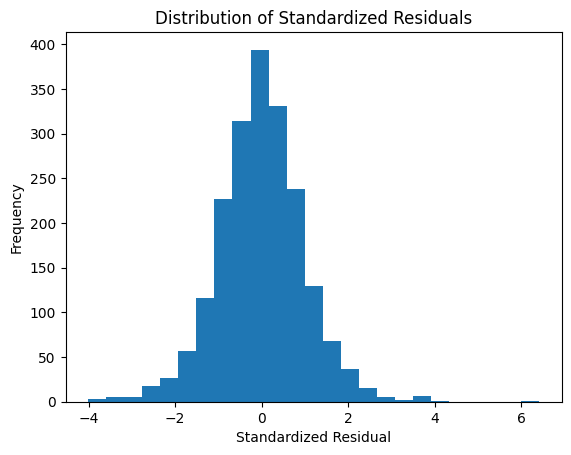

In [78]:
# Create histogram of standardized residuals, 25 bins
plt.hist(model.std_resid, bins=25)

# Add axis labels
plt.xlabel("Standardized Residual")
plt.ylabel("Frequency")


# Add title
plt.title("Distribution of Standardized Residuals")

Text(0, 0.5, 'Correlation Coefficient')

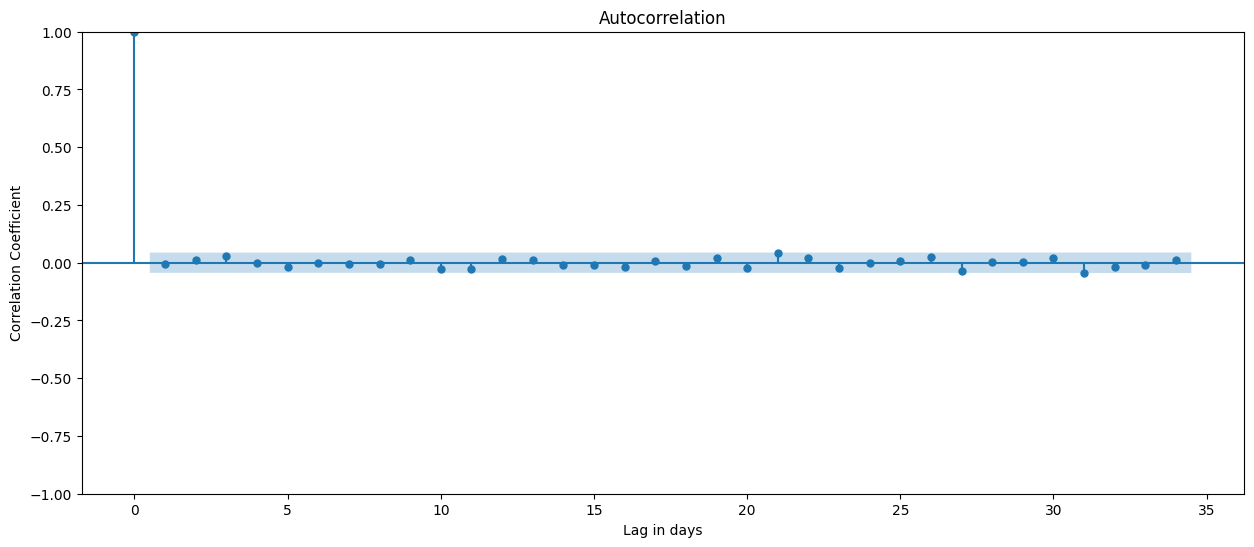

In [79]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model.std_resid**2, ax=ax)

# Add axis labels
plt.xlabel('Lag in days')
plt.ylabel('Correlation Coefficient')

## Evaluate

In [80]:
y_ambuja_train.tail(1)

date
2022-04-29   -3.05045
Name: return, dtype: float64

In [81]:
one_day_forecast = model.forecast(horizon=1, reindex=False).variance #horizon: numner of days you want to predict

print("one_day_forecast type:", type(one_day_forecast))
one_day_forecast # prediction for variance

one_day_forecast type: <class 'pandas.core.frame.DataFrame'>


,h.1
date,
2022-04-29,5.012949


In [82]:
one_day_forecast.iloc[0] ** 0.5 # prediction for std

h.1    2.238962
Name: 2022-04-29 00:00:00, dtype: float64

In [83]:
predictions = []

# Calculate size of test data (20%)
test_size = int(len(y_ambuja) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = y_ambuja.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(y_train, p=1, q=1, rescale=False).fit(disp=0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0] ** 0.5

    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv = pd.Series(predictions, index=y_ambuja.tail(test_size).index)

print("y_test_wfv type:", type(y_test_wfv))
print("y_test_wfv shape:", y_test_wfv.shape)
y_test_wfv.head()

y_test_wfv type: <class 'pandas.core.series.Series'>
y_test_wfv shape: (500,)


date
2022-05-02    2.238962
2022-05-04    2.191863
2022-05-05    2.223093
2022-05-06    2.141292
2022-05-09    2.063583
dtype: float64

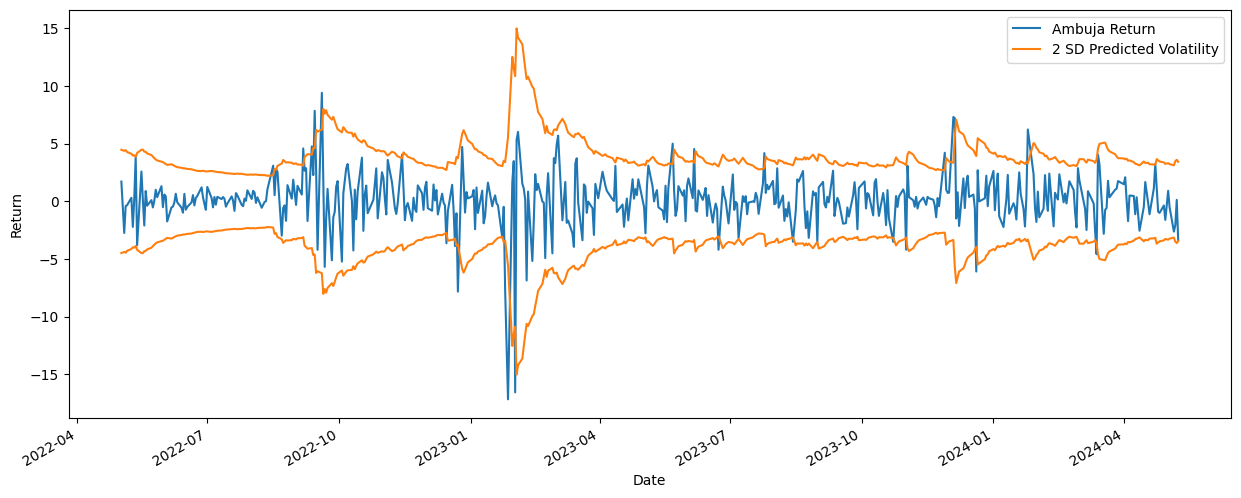

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
y_ambuja.tail(test_size).plot(ax=ax, label="Ambuja Return")

# Plot volatility predictions * 2
(2 * y_test_wfv).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend()

# Communicate Results

In [85]:
# Generate 5-day volatility forecast
prediction = model.forecast(horizon=5, reindex=False).variance ** 0.5
print(prediction)

# Calculate forecast start date
start = prediction.index[0] + pd.DateOffset(days=1)

# Create date range
prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

# Create prediction index labels, ISO 8601 format
prediction_index = [d.isoformat() for d in prediction_dates]

print("prediction_index type:", type(prediction_index))
print("prediction_index len:", len(prediction_index))
prediction_index[:3]

                 h.1       h.2       h.3       h.4       h.5
date                                                        
2024-05-08  1.718887  1.735332  1.750506  1.764518  1.777465
prediction_index type: <class 'list'>
prediction_index len: 5


['2024-05-09T00:00:00', '2024-05-10T00:00:00', '2024-05-13T00:00:00']

In [86]:
def clean_prediction(prediction):

    """Reformat model prediction to JSON.

    Parameters
    ----------
    prediction : pd.DataFrame
        Variance from a `ARCHModelForecast`

    Returns
    -------
    dict
        Forecast of volatility. Each key is date in ISO 8601 format.
        Each value is predicted volatility.
    """
    # Calculate forecast start date
    start = prediction.index[0] + pd.DateOffset(days=1)

    # Create date range
    prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

    # Create prediction index labels, ISO 8601 format
    prediction_index = [d.isoformat() for d in prediction_dates]


    # Extract predictions from DataFrame, get square root
    data = prediction.values.flatten() ** 0.5

    # Combine `data` and `prediction_index` into Series
    prediction_formatted = pd.Series(data, index=prediction_index)

    # Return Series as dictionary
    return prediction_formatted.to_dict()

In [87]:
prediction = model.forecast(horizon=10, reindex=False).variance
prediction_formatted = clean_prediction(prediction)

# Is `prediction_formatted` a dictionary?
assert isinstance(prediction_formatted, dict)

# Are keys correct data type?
assert all(isinstance(k, str) for k in prediction_formatted.keys())

# Are values correct data type
assert all(isinstance(v, float) for v in prediction_formatted.values())

prediction_formatted

{'2024-05-09T00:00:00': 1.7188867173630886,
 '2024-05-10T00:00:00': 1.7353320442766296,
 '2024-05-13T00:00:00': 1.7505059922995139,
 '2024-05-14T00:00:00': 1.7645176973578152,
 '2024-05-15T00:00:00': 1.7774652065897756,
 '2024-05-16T00:00:00': 1.7894368824218456,
 '2024-05-17T00:00:00': 1.8005125840619267,
 '2024-05-20T00:00:00': 1.8107646690508832,
 '2024-05-21T00:00:00': 1.82025884804261,
 '2024-05-22T00:00:00': 1.829054918877239}

# Making a Garch Model Module

In [88]:
from model import GarchModel

# Instantiate a `GarchModel`
gm_ambuja = GarchModel(ticker="AMBUJACEM.BSE", repo=repo, use_new_data=False)

# Does `gm_ambuja` have the correct attributes?
assert gm_ambuja.ticker == "AMBUJACEM.BSE"
assert gm_ambuja.repo == repo
assert not gm_ambuja.use_new_data
assert gm_ambuja.model_directory == settings.model_directory

In [89]:
gm_ambuja.repo

In [90]:
# Instantiate `GarchModel`, use new data
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=True)

# Check that model doesn't have `data` attribute yet
assert not hasattr(model_shop, "data")

# Wrangle data
model_shop.wrangle_data(n_observations=1000)

# Does model now have `data` attribute?
assert hasattr(model_shop, "data")

# Is the `data` a Series?
assert isinstance(model_shop.data, pd.Series)

# Is Series correct shape?
assert model_shop.data.shape == (1000,)

model_shop.data.head()

date
2020-05-05   -5.284090
2020-05-06   -2.699488
2020-05-07    1.418029
2020-05-08   -1.003073
2020-05-11    0.000000
Name: return, dtype: float64

In [91]:
# Instantiate `GarchModel`, use old data
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=False)

# Wrangle data
model_shop.wrangle_data(n_observations=1000)

# Fit GARCH(1,1) model to data
model_shop.fit(p=1, q=1)

# Does `model_shop` have a `model` attribute now?
assert hasattr(model_shop, "model")

# Is model correct data type?
assert isinstance(model_shop.model, ARCHModelResult)

# Does model have correct parameters?
assert model_shop.model.params.index.tolist() == ["mu", "omega", "alpha[1]", "beta[1]"]

# Check model parameters
model_shop.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2361.96
Distribution:                  Normal   AIC:                           4731.93
Method:            Maximum Likelihood   BIC:                           4751.56
                                        No. Observations:                 1000
Date:                Fri, May 10 2024   Df Residuals:                      999
Time:                        21:32:30   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1492  7.113e-02      2.098  3.590e-02 [9.825e-03,  0.289]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0396  5.760e-02      0.687      0.492   [-7.329e-02,  0.152]
alpha[1]       0.0118  7.599e-03      1.556      0.120 [-3.073e-03,2.671e-02]
beta[1]        0.9803  1.458e-02     67.232      0.000      [  0.952,  1.009]
=============================================================================

Covariance estimator: robust
"""

In [92]:
# Generate prediction from `model_shop`
prediction = model_shop.predict_volatility(horizon=5)

# Is prediction a dictionary?
assert isinstance(prediction, dict)

# Are keys correct data type?
assert all(isinstance(k, str) for k in prediction.keys())

# Are values correct data type?
assert all(isinstance(v, float) for v in prediction.values())

prediction

{'2024-05-10T00:00:00': 2.001749962610957,
 '2024-05-13T00:00:00': 2.003726795196899,
 '2024-05-14T00:00:00': 2.005686073849583,
 '2024-05-15T00:00:00': 2.007627973219234,
 '2024-05-16T00:00:00': 2.0095526658535316}

**Making a Dump Method**

In [93]:
# Save `model_shop` model, assign filename
filename = model_shop.dump()

# Is `filename` a string?
assert isinstance(filename, str)

# Does filename include ticker symbol?
assert model_shop.ticker in filename

# Does file exist?
assert os.path.exists(filename)

filename

'models\\SHOPERSTOP.BSE_model_2024-05-10T21-32-34.pkl'

**Loading Model**

In [94]:
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=False)

# Check that new `model_shop_test` doesn't have model attached
assert not hasattr(model_shop, "model")

# Load model
model_shop.load()

# Does `model_shop_test` have model attached?
assert hasattr(model_shop, "model")

model_shop.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2361.96
Distribution:                  Normal   AIC:                           4731.93
Method:            Maximum Likelihood   BIC:                           4751.56
                                        No. Observations:                 1000
Date:                Fri, May 10 2024   Df Residuals:                      999
Time:                        21:32:30   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1492  7.113e-02      2.098  3.590e-02 [9.825e-03,  0.289]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0396  5.760e-02      0.687      0.492   [-7.329e-02,  0.152]
alpha[1]       0.0118  7.599e-03      1.556      0.120 [-3.073e-03,2.671e-02]
beta[1]        0.9803  1.458e-02     67.232      0.000      [  0.952,  1.009]
=============================================================================

Covariance estimator: robust
"""

## Creating our App

In [96]:
import requests

url = "http://localhost:7000/"
response = requests.get(url)

ConnectionError: HTTPConnectionPool(host='localhost', port=7000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000149F25BBAA0>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [ ]:
from app import FitIn, FitOut

# Instantiate 'FitIn' class
fi = FitIn(
    ticker='SHOPERSTOP.BSE',
    use_new_data=True,
    n_observations=2000,
    p=1,
    q=1
)
print(fi)

#Instantiate 'FitOut' class
fo = FitOut(
    ticker='SHOPERSTOP.BSE',
    use_new_data=True,
    n_observations=2000,
    p=1,
    q=1,
    success=True,
    message="Model is ready to rock"
)
print(fo)

ticker='SHOPERSTOP.BSE' use_new_data=True n_observations=2000 p=1 q=1
ticker='SHOPERSTOP.BSE' use_new_data=True n_observations=2000 p=1 q=1 success=True message='Model is ready to rock'


In [ ]:
fi.schema()

{'properties': {'ticker': {'title': 'Ticker', 'type': 'string'},
  'use_new_data': {'title': 'Use New Data', 'type': 'boolean'},
  'n_observations': {'title': 'N Observations', 'type': 'integer'},
  'p': {'title': 'P', 'type': 'integer'},
  'q': {'title': 'Q', 'type': 'integer'}},
 'required': ['ticker', 'use_new_data', 'n_observations', 'p', 'q'],
 'title': 'FitIn',
 'type': 'object'}

In [ ]:
from app import build_model

# Instantiate `GarchModel` with function
model_shop = build_model(ticker="SHOPERSTOP.BSE", use_new_data=False)

# Is `SQLRepository` attached to `model_shop`?
assert isinstance(model_shop.repo, SQLRepository)

# Is SQLite database attached to `SQLRepository`
assert isinstance(model_shop.repo.connection, sqlite3.Connection)

# Is `ticker` attribute correct?
assert model_shop.ticker == "SHOPERSTOP.BSE"

# Is `use_new_data` attribute correct?
assert not model_shop.use_new_data

model_shop

In [ ]:
# URL of `/fit` path
url = 'http://localhost:70000/fit'

# Data to send to path
json = {
    "ticker": "SHOPERSTOP.BSE",
    "use_new_data": False,
    "n_observations": 2000,
    "p": 1,
    "q": 1
}
# Response of post request
response = requests.post(url=url, json=json)
# Inspect response
print("response code:", response.status_code)
response.json()

response code: 404


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
from app import PredictIn, PredictOut

pi = PredictIn(ticker="SHOPERSTOP.BSE", n_days=5)
print(pi)

po = PredictOut(
    ticker="SHOPERSTOP.BSE", n_days=5, success=True, forecast={}, message="success"
)
print(po)

ticker='SHOPERSTOP.BSE' n_days=5
ticker='SHOPERSTOP.BSE' n_days=5 success=True forecast={} message='success'


In [ ]:
# URL of `/predict` path
url = 'http://localhost:8009/predict'
# Data to send to path
json = {"ticker":"SHOPERSTOP.BSE", "n_days": 5}
# Response of post request
response = requests.post(url=url, json=json)
# Response JSON to be submitted to grader
submission = response.json()
# Inspect JSON
submission

[autoreload of app failed: Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Python312\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\urllib3\connectionpool.py", line 793, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\urllib3\connectionpool.py", line 496, in _make_request
    conn.request(
  File "c:\Python312\Lib\site-package

ConnectionError: HTTPConnectionPool(host='localhost', port=8009): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001C073C6F7D0>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [ ]:
df = pd.DataFrame(submission)
df

,ticker,n_days,success,forecast,message
2024-05-09T00:00:00,SHOPERSTOP.BSE,5,True,2.007862,
2024-05-10T00:00:00,SHOPERSTOP.BSE,5,True,2.009922,
2024-05-13T00:00:00,SHOPERSTOP.BSE,5,True,2.011963,
2024-05-14T00:00:00,SHOPERSTOP.BSE,5,True,2.013986,
2024-05-15T00:00:00,SHOPERSTOP.BSE,5,True,2.015990,


In [ ]:
df = pd.DataFrame(submission)
df.drop(columns=["message"], inplace=True)
df

,ticker,n_days,success,forecast
2024-05-09T00:00:00,SHOPERSTOP.BSE,5,True,2.007862
2024-05-10T00:00:00,SHOPERSTOP.BSE,5,True,2.009922
2024-05-13T00:00:00,SHOPERSTOP.BSE,5,True,2.011963
2024-05-14T00:00:00,SHOPERSTOP.BSE,5,True,2.013986
2024-05-15T00:00:00,SHOPERSTOP.BSE,5,True,2.015990


[autoreload of app failed: Traceback (most recent call last):
  File "C:\Users\MAISON INFO\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\MAISON INFO\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Python312\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "c:\Users\MAISON INFO\Desktop\Predicting-stock-volatility\app.py", line 156, in <module>
    st.write(df.describe())
             ^^
NameError: name 'df' is not defined
]


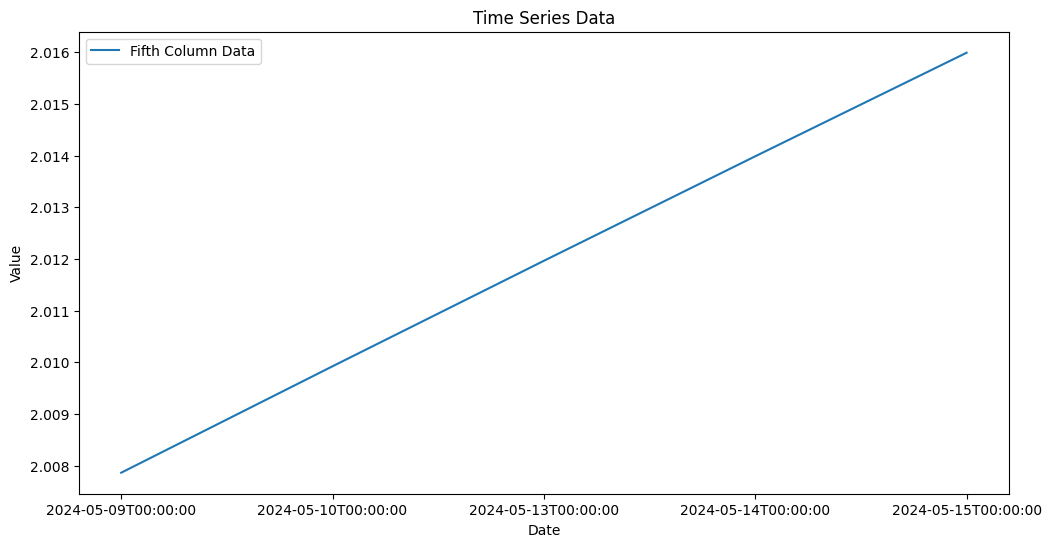

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["forecast"], label='Fifth Column Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [97]:
data = {
"ticker":"SHOPERSTOP.BSE",
"n_days":5,
"success": True,
"forecast":{
    "2024-05-13T00:00:00":1.9881145228580492,
    "2024-05-14T00:00:00":2.0019626681378364,
    "2024-05-15T00:00:00":2.015437458650438,
    "2024-05-16T00:00:00":2.028551945577089,
    "2024-05-17T00:00:00":2.0413185360538604,
    "2024-05-20T00:00:00":2.0537490374295606,
    "2024-05-21T00:00:00":2.065854697586131,
    "2024-05-22T00:00:00":2.0776462417471318,
    "2024-05-23T00:00:00":2.089133906146263,
    "2024-05-24T00:00:00":2.1003274688818747
},
"message":""
}

In [99]:
forecast = pd.DataFrame(data)
forecast

,ticker,n_days,success,forecast,message
2024-05-13T00:00:00,SHOPERSTOP.BSE,5,True,1.988115,
2024-05-14T00:00:00,SHOPERSTOP.BSE,5,True,2.001963,
2024-05-15T00:00:00,SHOPERSTOP.BSE,5,True,2.015437,
2024-05-16T00:00:00,SHOPERSTOP.BSE,5,True,2.028552,
2024-05-17T00:00:00,SHOPERSTOP.BSE,5,True,2.041319,


In [101]:
forecast.columns

Index(['ticker', 'n_days', 'success', 'forecast', 'message'], dtype='object')

In [114]:
fore = pd.DataFrame(forecast.index)
fore.rename(columns={0: 'Date'}, inplace=True)
Date = fore["Date"]
Date

0    2024-05-13T00:00:00
1    2024-05-14T00:00:00
2    2024-05-15T00:00:00
3    2024-05-16T00:00:00
4    2024-05-17T00:00:00
Name: Date, dtype: object

In [128]:
import pandas as pd

fore = pd.DataFrame(forecast.index)
fore.rename(columns={0: 'Date'}, inplace=True)
Date = fore["Date"]

# Get the number of periods
num_periods = len(Date)

# Create date range
prediction_dates = pd.bdate_range(start=start, periods=num_periods)

# Create prediction index labels, ISO 8601 format
prediction_index = [d.isoformat().split('T')[0] for d in prediction_dates]
prediction_index


['2024-05-09', '2024-05-10', '2024-05-13', '2024-05-14', '2024-05-15']

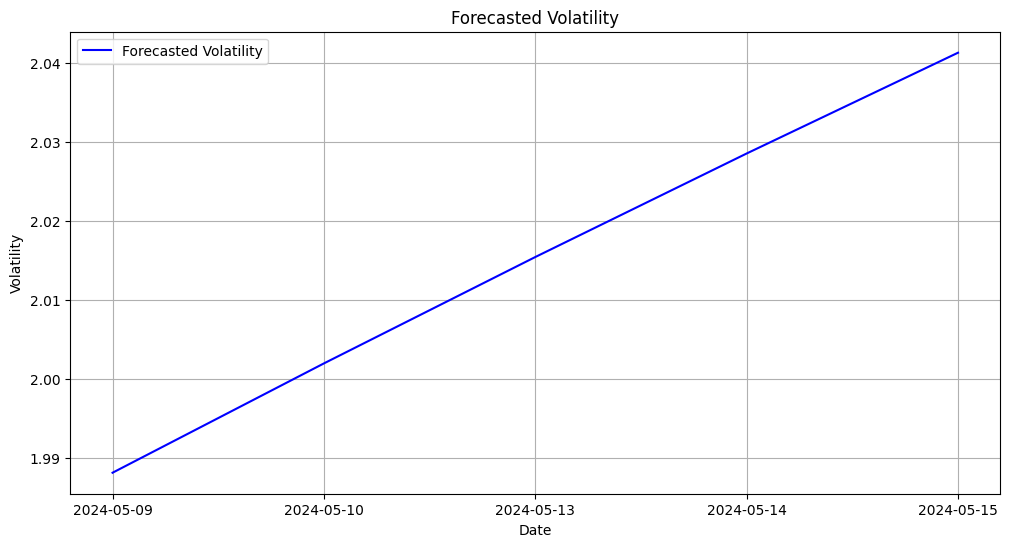

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(prediction_index, forecast['forecast'], label='Forecasted Volatility', color='blue')
#plt.plot(forecast_df['Date'], forecast_df['Volatility'], label='Forecasted Volatility', color='blue')
plt.title('Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()